In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Preview of Data

1) There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).

2) There are no null values, so we don't have to worry about that.

3) There are 50 observations of each species (setosa, versicolor, virginica).

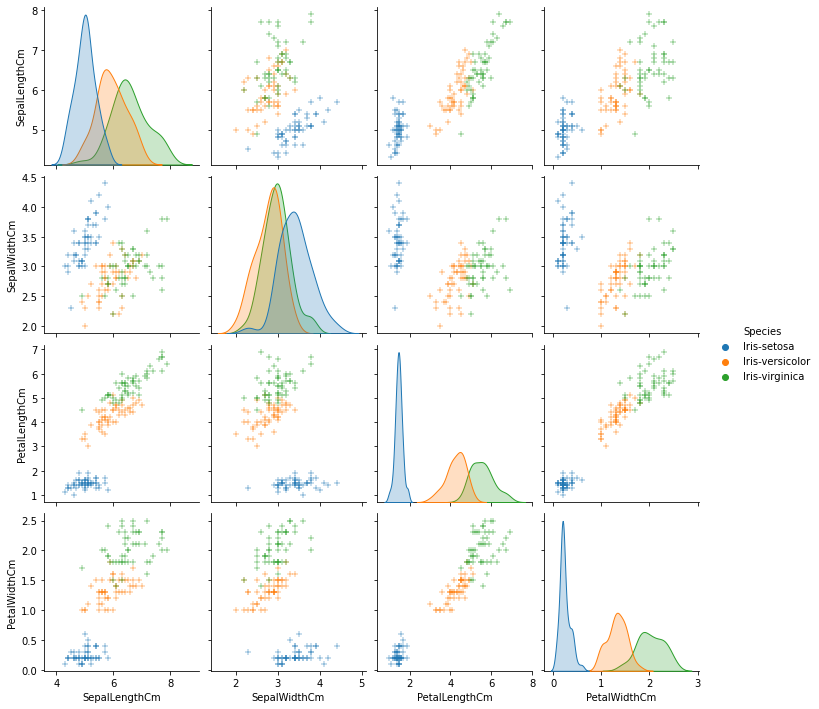

In [ ]:
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations

vis = data.drop('Id',axis=1)
graph = sns.pairplot(vis,hue="Species",markers='+')
plt.show()

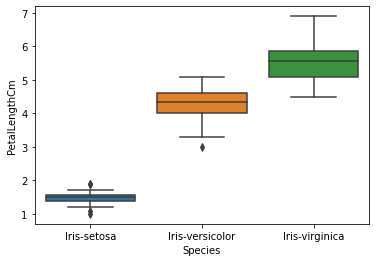

In [ ]:

sns.boxplot(x= "Species", y= "PetalLengthCm",data = data)

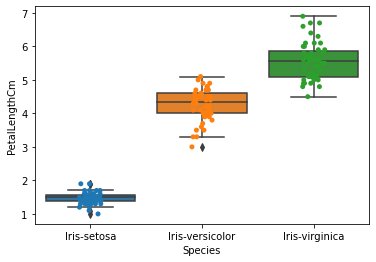

In [ ]:
sns.boxplot(x= "Species", y= "PetalLengthCm",data = data)
sns.stripplot(x= "Species", y= "PetalLengthCm",data = data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f91324eaa20>,
      dtype=object)

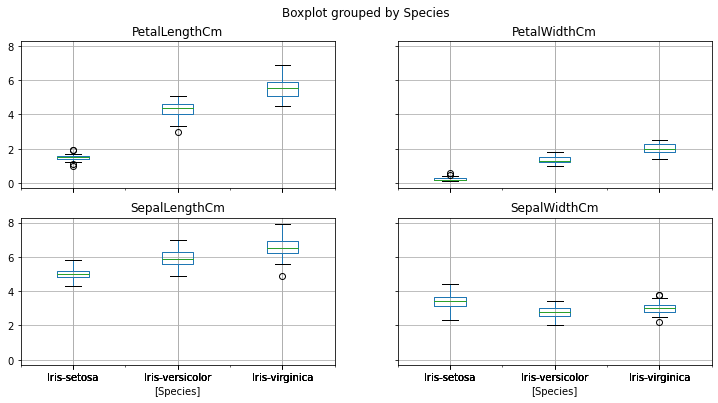

In [ ]:
# Box Plot Grid

data.drop("Id", axis =1).boxplot(by="Species" , figsize = (12 , 6))

###Train and test on the same dataset

In [ ]:

# Seperating the data into dependent and independent variables
real_x= data.iloc[:, 1:-1].values
real_y = data.iloc[:, -1].values

In [ ]:
training_x ,testing_x ,training_y ,testing_y = train_test_split(real_x ,real_y,test_size = 0.25,random_state = 0)
print(training_x.shape)
print(testing_x.shape)

(112, 4)
(38, 4)


##Training the model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
model = knn.fit(training_x,training_y)

print("Model train succesfully")


Model train succesfully


In [ ]:
y_pred = model.predict(testing_x)
print("Training Accuracy :",model.score(training_x,training_y))
print("Testing Accuracy: :",accuracy_score(testing_y, y_pred))

Training Accuracy : 0.9732142857142857
Testing Accuracy: : 0.9736842105263158


In [ ]:
# Confusion Matrix
print(confusion_matrix(testing_y ,y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [ ]:
print(classification_report(testing_y ,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [ ]:
testing_y

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [ ]:
new_data = model.predict([[5.1,	3.5	,1.4,	0.2]])
new_data

array(['Iris-setosa'], dtype=object)